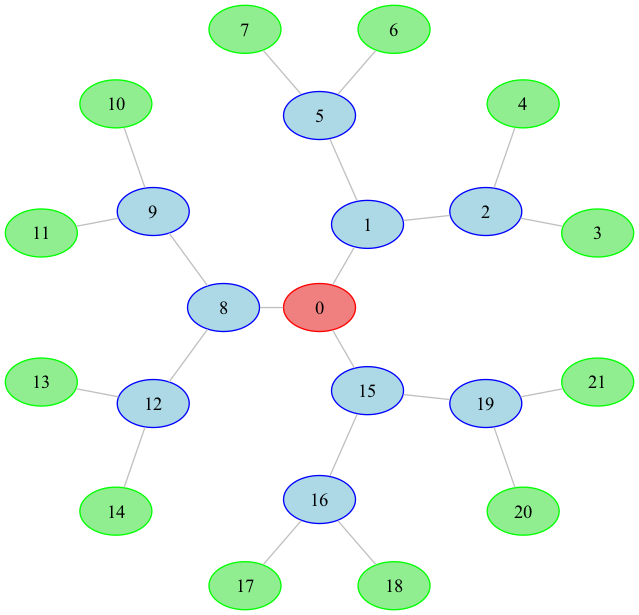

In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
import matplotlib.pyplot as plt

def create_cayley_tree(d, n):
    """
    Create a Cayley tree with coordination number d and generations n.
    """
    G = nx.Graph()
    node_counter = 0  # Node IDs start from 0

    def add_children(parent, generation):
        nonlocal node_counter
        if generation < n:
            if generation == 0:
                # Root node: d children
                num_children = d
            else:
                # Inner nodes: d-1 children
                num_children = d - 1
            for _ in range(num_children):
                node_counter += 1
                child = node_counter
                G.add_node(child, generation=generation + 1)
                G.add_edge(parent, child)
                add_children(child, generation + 1)
        else:
            # Leaf node; mark it
            G.nodes[parent]['is_leaf'] = True

    # Initialize root node
    root = node_counter
    G.add_node(root, generation=0)
    add_children(root, 0)
    return G

def plot_cayley_tree_central(G, title):
    # Convert NetworkX graph to PyGraphviz AGraph
    A = to_agraph(G)

    # Customize node attributes
    for node in G.nodes():
        n = A.get_node(node)
        data = G.nodes[node]
        if data.get('is_leaf', False):
            n.attr['color'] = 'green'
            n.attr['style'] = 'filled'
            n.attr['fillcolor'] = 'lightgreen'
        elif data['generation'] == 0:
            # Central node
            n.attr['color'] = 'red'
            n.attr['style'] = 'filled'
            n.attr['fillcolor'] = 'lightcoral'
        else:
            n.attr['color'] = 'blue'
            n.attr['style'] = 'filled'
            n.attr['fillcolor'] = 'lightblue'

    # Customize edge attributes
    for edge in G.edges():
        e = A.get_edge(edge[0], edge[1])
        e.attr['color'] = 'gray'

    # Apply a layout algorithm
    A.layout('twopi')  # Radial layout, central node in the middle

    # Draw the graph to a file and display it inline
    import tempfile
    from IPython.display import Image, display
    with tempfile.NamedTemporaryFile(suffix=".png") as tmpfile:
        A.draw(tmpfile.name)
        display(Image(filename=tmpfile.name))

# Parameters
d = 3  # Coordination number (degree of inner nodes)
n = 4  # Number of generations (including root)

# Generate the Cayley tree
G = create_cayley_tree(d, n)

# Plot the Cayley tree
plot_cayley_tree_central(G, f'Cayley Tree with d={d}, n={n}')
